In [1]:
import os

dataset_path = "/home/yo/Downloads/EXcelR_Internship/Project2/Project602/Resumes"

print("RESUME DATASET EXPLORATION")

if not os.path.exists(dataset_path):
    print(f" Path not found: {dataset_path}")
    print("Please update the 'dataset_path' variable with your correct path")
else:
    print(f" Dataset path found!\n")
    
    # List all folders (categories)
    categories = []
    for item in os.listdir(dataset_path):
        item_path = os.path.join(dataset_path, item)
        if os.path.isdir(item_path):
            categories.append(item)
    
    print(f"Total Subfolders Found: {len(categories)}\n")
    
    # Count files directly in Resumes folder
    direct_files = []
    for item in os.listdir(dataset_path):
        item_path = os.path.join(dataset_path, item)
        if os.path.isfile(item_path):
            direct_files.append(item)
    
    # Show files directly in Resumes folder
    if direct_files:
        print(" Files in Main Resumes Folder (no subfolder):")
      
        print(f"   {len(direct_files)} files found")
        print(f"   Examples: {direct_files[:3]}")  # Show first 3
        print()
    
    # Show each category with file count
    print("Category Subfolders:")
    
    total_files = len(direct_files)
    for category in sorted(categories):
        category_path = os.path.join(dataset_path, category)
        files = os.listdir(category_path)
        file_count = len(files)
        total_files += file_count
        
        print(f" {category}: {file_count} files")

    print(f"\n TOTAL Resume Files: {total_files}")
    print(f"   - Files in main folder: {len(direct_files)}")
    print(f"   - Files in subfolders: {total_files - len(direct_files)}")
    print(f" Total Subfolders: {len(categories)}")

RESUME DATASET EXPLORATION
 Dataset path found!

Total Subfolders Found: 3

 Files in Main Resumes Folder (no subfolder):
   24 files found
   Examples: ['Reactjs Developer_kambala sai surendra_Musquare Technologies.docx', 'React Developer_Thirupathiamma.docx', 'Reactjs Developer_Shaik Abdul Sharuk_Musquare Technologies.docx']

Category Subfolders:
 Peoplesoft resumes: 20 files
 SQL Developer Lightning insight: 14 files
 workday resumes: 21 files

 TOTAL Resume Files: 79
   - Files in main folder: 24
   - Files in subfolders: 55
 Total Subfolders: 3


In [2]:
import os
from collections import Counter

dataset_path = "/home/yo/Downloads/EXcelR_Internship/Project2/Project602/Resumes"

print("FILE TYPE ANALYSIS")

# Collect all file extensions
file_extensions = []

# Get files from main folder
for item in os.listdir(dataset_path):
    item_path = os.path.join(dataset_path, item)
    if os.path.isfile(item_path):
        ext = os.path.splitext(item)[1].lower()
        file_extensions.append(ext)

# Get files from subfolders
for item in os.listdir(dataset_path):
    item_path = os.path.join(dataset_path, item)
    if os.path.isdir(item_path):
        for file in os.listdir(item_path):
            ext = os.path.splitext(file)[1].lower()
            file_extensions.append(ext)

# Count file types
file_type_counts = Counter(file_extensions)

print("\nFile Types Found:")

for ext, count in file_type_counts.most_common():
    percentage = (count / len(file_extensions)) * 100
    print(f"{ext:10} : {count:3} files ({percentage:.1f}%)")

print(f"Total Files: {len(file_extensions)}")

# Check if we need different libraries for different formats
print("\n Libraries We'll Need:")

if '.pdf' in file_type_counts:
    print(" PyPDF2 or pdfplumber (for PDF files)")
if '.docx' in file_type_counts:
    print(" python-docx (for DOCX files)")
if '.doc' in file_type_counts:
    print(" textract or antiword (for old DOC files)")


FILE TYPE ANALYSIS

File Types Found:
.docx      :  52 files (65.8%)
.doc       :  26 files (32.9%)
.pdf       :   1 files (1.3%)
Total Files: 79

 Libraries We'll Need:
 PyPDF2 or pdfplumber (for PDF files)
 python-docx (for DOCX files)
 textract or antiword (for old DOC files)


In [3]:
import os
from docx import Document
import PyPDF2
import pandas as pd
import docx2txt

dataset_path = "/home/yo/Downloads/EXcelR_Internship/Project2/Project602/Resumes"

print("READING ALL RESUMES - INCLUDING .DOC FILES")

def read_doc(file_path):
    try:
        text = docx2txt.process(file_path)
        return text
    except Exception as e:
        return None

def read_docx(file_path):
    try:
        doc = Document(file_path)
        text = []
        for paragraph in doc.paragraphs:
            text.append(paragraph.text)
        return '\n'.join(text)
    except Exception as e:
        return None

def read_pdf(file_path):
    try:
        text = []
        with open(file_path, 'rb') as file:
            pdf_reader = PyPDF2.PdfReader(file)
            for page in pdf_reader.pages:
                text.append(page.extract_text())
        return '\n'.join(text)
    except Exception as e:
        return None

resume_data = []
success_count = 0
fail_count = 0


for item in os.listdir(dataset_path):
    item_path = os.path.join(dataset_path, item)
    
    if os.path.isfile(item_path):
        file_name = item
        file_ext = os.path.splitext(item)[1].lower()
        category = 'React Developer'
        
        content = None
        if file_ext == '.docx':
            content = read_docx(item_path)
        elif file_ext == '.pdf':
            content = read_pdf(item_path)
        elif file_ext == '.doc':
            content = read_doc(item_path)
        
        if content:
            resume_data.append({
                'filename': file_name,
                'category': category,
                'content': content
            })
            success_count += 1
            print(f"Success: {file_name[:50]}")
        else:
            fail_count += 1
            print(f"Failed: {file_name}")

for folder in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder)
    
    if os.path.isdir(folder_path):
        category = folder
        
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            file_ext = os.path.splitext(file)[1].lower()
            
            content = None
            if file_ext == '.docx':
                content = read_docx(file_path)
            elif file_ext == '.pdf':
                content = read_pdf(file_path)
            elif file_ext == '.doc':
                content = read_doc(file_path)
            
            if content:
                resume_data.append({
                    'filename': file,
                    'category': category,
                    'content': content
                })
                success_count += 1
                print(f"Success: [{category}] {file[:40]}")
            else:
                fail_count += 1
                print(f"Failed: {file}")

print("SUMMARY")
print(f"Successfully read: {success_count} resumes")
print(f"Failed to read: {fail_count} resumes")
print(f"Total processed: {success_count + fail_count}")

if resume_data:
    df = pd.DataFrame(resume_data)
    output_file = "resumes_data.csv"
    df.to_csv(output_file, index=False)
    print(f"\nData saved to: {output_file}")
    print(f"Columns: {list(df.columns)}")
    print(f"Shape: {df.shape}")


READING ALL RESUMES - INCLUDING .DOC FILES
Success: Reactjs Developer_kambala sai surendra_Musquare Te
Success: React Developer_Thirupathiamma.docx
Success: Reactjs Developer_Shaik Abdul Sharuk_Musquare Tech
Success: React Dev_Krishna Kanth.docx
Success: React Developer_Haripriya.docx
Failed: React Developer_Vinay Reddy.doc
Success: Reactjs Developer_Ranga Gaganam_Musquare Technolog
Failed: React JS Developer_AnjaniPriyadarshini.doc
Success: Reactjs Developer_M Lokesh.docx
Success: Reactjs Developer_MD Khizaruddin Rauf _Musquare Te
Success: Internship_Susovan Bag_Musquare Technologies.docx
Success: React Developer_Naveen sadhu.docx
Success: Internship_Ravali_Musquare Technologies (1).docx
Success: React Dev_Krishna Kanth_Musquare Technologies.docx
Success: React Developer_Deepakreddy.docx
Success: React Developer_Pragnya.docx
Success: Reactjs Developer_Prabakaran_Musquare Technologies
Success: React JS Developer_KotaniDurgaprasad[3_1] (1)-conv
Failed: React Developer_PavasGoswami.doc
S

In [4]:
import os
import subprocess
import docx2txt
import PyPDF2
import pandas as pd
import glob

def extract_text_from_file(file_path):
    ext = file_path.split(".")[-1].lower()
    
    if ext == "docx":
        try:
            return docx2txt.process(file_path)
        except:
            return ""
    
    elif ext == "doc":
        try:
            output = subprocess.check_output(["antiword", file_path])
            return output.decode("utf-8", errors="ignore")
        except:
            return ""
    
    elif ext == "pdf":
        try:
            text = ""
            with open(file_path, "rb") as f:
                reader = PyPDF2.PdfReader(f)
                for page in reader.pages:
                    page_text = page.extract_text()
                    if page_text:
                        text += page_text
            return text
        except:
            return ""
    else:
        return ""

base_path = "/home/yo/Downloads/EXcelR_Internship/Project2/Project602/Resumes"

all_files = glob.glob(f"{base_path}/**/*.*", recursive=True)

print("Total files found:", len(all_files))

resume_data = []
success = 0
failed = 0

for file_path in all_files:
    text = extract_text_from_file(file_path)
    
    if text:
        filename = os.path.basename(file_path)
        parent_folder = os.path.basename(os.path.dirname(file_path))
        
        if parent_folder == "Resumes":
            category = "React Developer"
        else:
            category = parent_folder
        
        resume_data.append({
            'filename': filename,
            'category': category,
            'content': text
        })
        success += 1
    else:
        failed += 1

df = pd.DataFrame(resume_data)
df.to_csv("resumes_all_79.csv", index=False)

print("Successfully read:", success)
print("Failed:", failed)
print("Saved to: resumes_all_79.csv")
print("\nCategories:")
print(df['category'].value_counts())

Total files found: 79
Successfully read: 79
Failed: 0
Saved to: resumes_all_79.csv

Categories:
category
React Developer                    24
workday resumes                    21
Peoplesoft resumes                 20
SQL Developer Lightning insight    14
Name: count, dtype: int64


In [5]:
import pandas as pd

# Load your existing CSV
df = pd.read_csv('resumes_all_79.csv')

# Define skills for each category
skill_keywords = {
    'React Developer': ['react', 'javascript', 'js', 'jsx', 'redux', 'html', 'css', 'node', 'typescript', 'npm', 'webpack', 'frontend', 'ui', 'ux', 'angular', 'vue'],
    'workday resumes': ['workday', 'hcm', 'hrms', 'payroll', 'benefits', 'recruiting', 'talent', 'integration', 'studio', 'eib', 'workday integration', 'prism'],
    'SQL Developer Lightning insight': ['sql', 'mysql', 'postgresql', 'oracle', 'database', 'query', 'stored procedure', 'etl', 'data warehouse', 'ssrs', 'ssis', 'plsql', 't-sql', 'nosql'],
    'Peoplesoft resumes': ['peoplesoft', 'oracle', 'fscm', 'hrms', 'financials', 'peopletools', 'sqr', 'app engine', 'integration broker', 'ps query', 'peoplecode']
}

# Function to extract skills
def extract_skills(text, category):
    text_lower = str(text).lower()
    found_skills = []
    
    category_skills = skill_keywords.get(category, [])
    
    for skill in category_skills:
        if skill in text_lower:
            found_skills.append(skill)
    
    return ', '.join(found_skills) if found_skills else 'No skills found'

# Add skills column
df['skills'] = df.apply(lambda row: extract_skills(row['content'], row['category']), axis=1)

# Save updated CSV
df.to_csv('resumes_all_79.csv', index=False)

print(" Skills column added and saved to resumes_all_79.csv")
print(f"Columns now: {list(df.columns)}")
print(f"\nSkills found per category:")
print(df.groupby('category')['skills'].apply(lambda x: (x != 'No skills found').sum()))

 Skills column added and saved to resumes_all_79.csv
Columns now: ['filename', 'category', 'content', 'skills']

Skills found per category:
category
Peoplesoft resumes                 20
React Developer                    23
SQL Developer Lightning insight    14
workday resumes                    21
Name: skills, dtype: int64


In [6]:
import pandas as pd

df = pd.read_csv("resumes_all_79.csv")

print("Total resumes:", len(df))
print("\nCategory counts:")
print(df['category'].value_counts())

Total resumes: 79

Category counts:
category
React Developer                    24
workday resumes                    21
Peoplesoft resumes                 20
SQL Developer Lightning insight    14
Name: count, dtype: int64


In [7]:
import pandas as pd
import re

df = pd.read_csv("resumes_all_79.csv")

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-z\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    return text

df['cleaned_text'] = df['content'].apply(clean_text)

df.to_csv("resumes_cleaned.csv", index=False)

print("Text cleaned successfully!")
print("\nBefore cleaning:")
print(df['content'][0][:150])
print("\nAfter cleaning:")
print(df['cleaned_text'][0][:150])
print("\nSaved to: resumes_cleaned.csv")

Text cleaned successfully!

Before cleaning:
KAMBALA SAI SURENDRA   

 

 

 







SUMMARY 

 

PROJECT 

 



 

 

 

 



 

Having basic knowledge in HTML, CSS, Bootstrap, JavaScript, Re

After cleaning:
kambala sai surendra summary project having basic knowledge in html css bootstrap javascript react js redux and jquery have very good analytical think

Saved to: resumes_cleaned.csv


DETAILED EDA

1. Dataset Info:
   Total resumes: 79
   Total categories: 4

2. Missing Values:
filename        0
category        0
content         0
skills          0
cleaned_text    0
dtype: int64

3. Text Statistics:
        text_length   word_count
count     79.000000    79.000000
mean    4840.215190   702.126582
std     2883.079126   407.386837
min     1331.000000   198.000000
25%     2826.000000   416.000000
50%     4084.000000   593.000000
75%     6058.500000   886.500000
max    17076.000000  2443.000000

4. Category-wise Statistics:
                                word_count           
                                      mean  min   max
category                                             
Peoplesoft resumes                   926.0  337  2443
React Developer                      435.0  198  1272
SQL Developer Lightning insight      623.0  387  1109
workday resumes                      847.0  464  1480


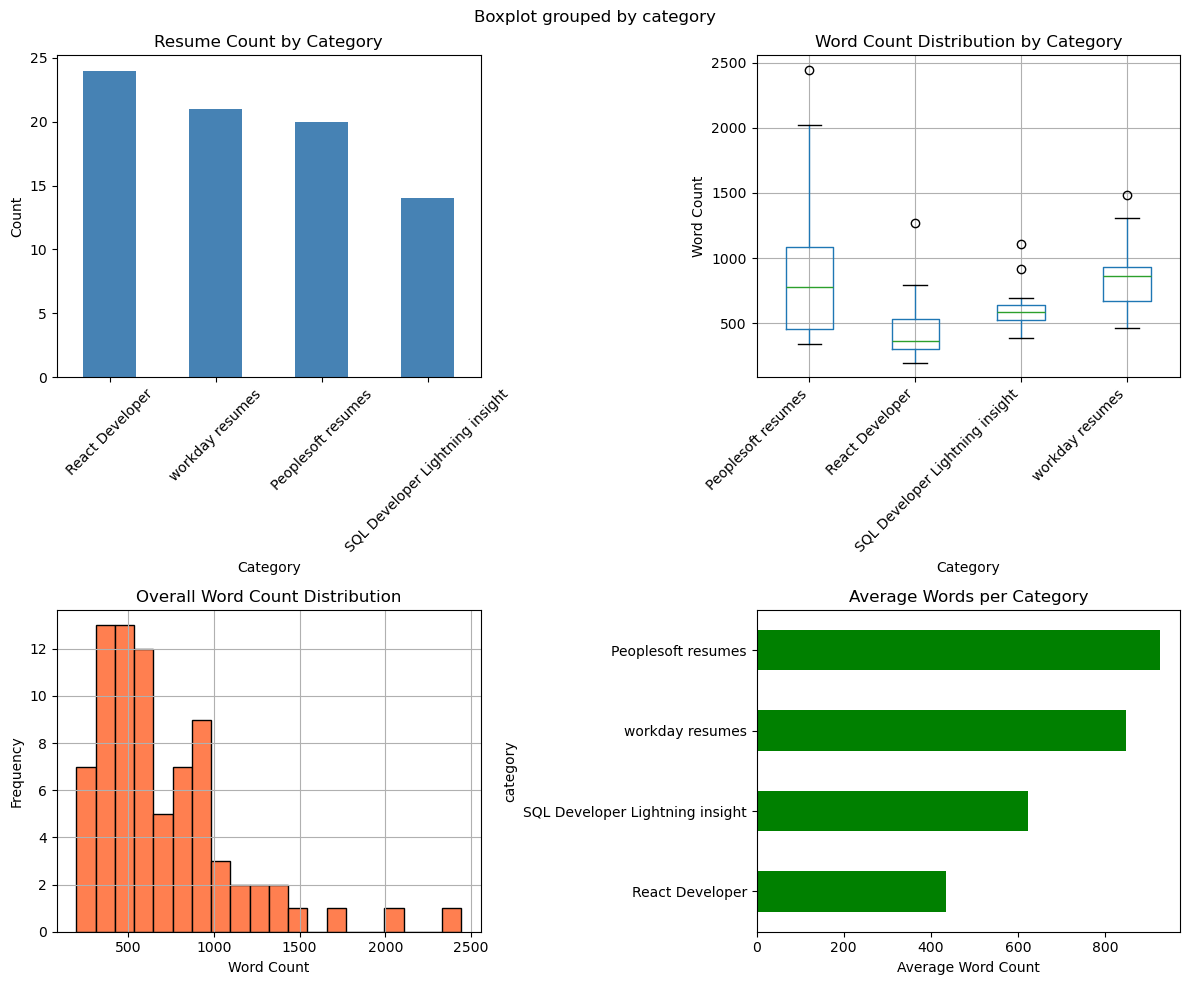

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("resumes_cleaned.csv")

print("DETAILED EDA")

print("\n1. Dataset Info:")
print(f"   Total resumes: {len(df)}")
print(f"   Total categories: {df['category'].nunique()}")

print("\n2. Missing Values:")
print(df.isnull().sum())

df['text_length'] = df['cleaned_text'].apply(len)
df['word_count'] = df['cleaned_text'].apply(lambda x: len(str(x).split()))

print("\n3. Text Statistics:")
print(df[['text_length', 'word_count']].describe())

print("\n4. Category-wise Statistics:")
stats = df.groupby('category').agg({
    'word_count': ['mean', 'min', 'max']
}).round(0)
print(stats)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

df['category'].value_counts().plot(kind='bar', ax=axes[0,0], color='steelblue')
axes[0,0].set_title('Resume Count by Category')
axes[0,0].set_xlabel('Category')
axes[0,0].set_ylabel('Count')
axes[0,0].tick_params(axis='x', rotation=45)

df.boxplot(column='word_count', by='category', ax=axes[0,1])
axes[0,1].set_title('Word Count Distribution by Category')
axes[0,1].set_xlabel('Category')
axes[0,1].set_ylabel('Word Count')
plt.sca(axes[0,1])
plt.xticks(rotation=45, ha='right')

df['word_count'].hist(bins=20, ax=axes[1,0], color='coral', edgecolor='black')
axes[1,0].set_title('Overall Word Count Distribution')
axes[1,0].set_xlabel('Word Count')
axes[1,0].set_ylabel('Frequency')

category_means = df.groupby('category')['word_count'].mean().sort_values()
category_means.plot(kind='barh', ax=axes[1,1], color='green')
axes[1,1].set_title('Average Words per Category')
axes[1,1].set_xlabel('Average Word Count')

plt.tight_layout()
plt.show()

In [9]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


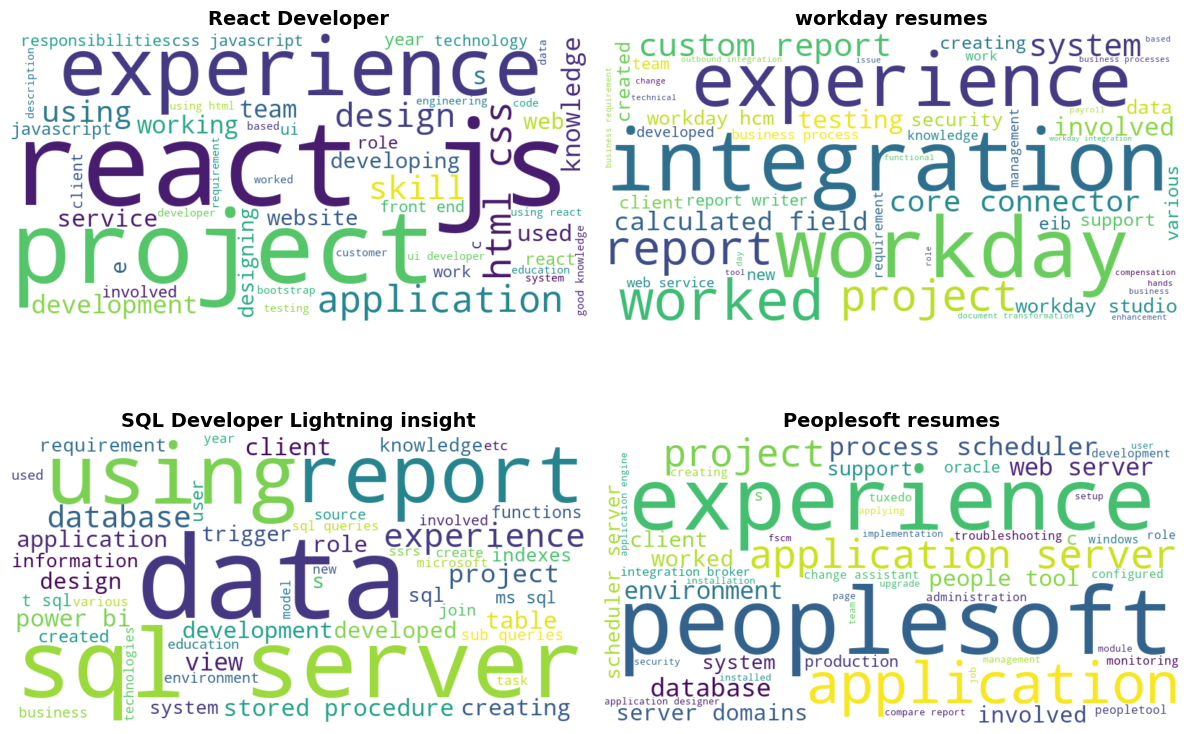

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

df = pd.read_csv("resumes_cleaned.csv")

categories = df['category'].unique()

fig, axes = plt.subplots(2, 2, figsize=(12, 9))
axes = axes.flatten()

for idx, category in enumerate(categories):
    text = ' '.join(df[df['category'] == category]['cleaned_text'].values)
    
    wordcloud = WordCloud(width=800, height=400, 
                          background_color='white',
                          colormap='viridis',
                          max_words=50).generate(text)
    
    axes[idx].imshow(wordcloud, interpolation='bilinear')
    axes[idx].set_title(f'{category}', fontsize=14, fontweight='bold')
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("resumes_cleaned.csv")

X = df['cleaned_text']
y = df['category']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Total data:", len(df))
print("Training data:", len(X_train))
print("Testing data:", len(X_test))

print("\nTraining set distribution:")
print(y_train.value_counts())

print("\nTesting set distribution:")
print(y_test.value_counts())

train_df = pd.DataFrame({'text': X_train, 'category': y_train})
test_df = pd.DataFrame({'text': X_test, 'category': y_test})

train_df.to_csv('train_data.csv', index=False)
test_df.to_csv('test_data.csv', index=False)

print("\nSaved train_data.csv and test_data.csv")

Total data: 79
Training data: 63
Testing data: 16

Training set distribution:
category
React Developer                    19
workday resumes                    17
Peoplesoft resumes                 16
SQL Developer Lightning insight    11
Name: count, dtype: int64

Testing set distribution:
category
React Developer                    5
workday resumes                    4
Peoplesoft resumes                 4
SQL Developer Lightning insight    3
Name: count, dtype: int64

Saved train_data.csv and test_data.csv


In [12]:
# converts text to numerical features.

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

train_df = pd.read_csv('train_data.csv')
test_df = pd.read_csv('test_data.csv')

X_train = train_df['text']
y_train = train_df['category']
X_test = test_df['text']
y_test = test_df['category']

tfidf = TfidfVectorizer(max_features=4000)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("TF-IDF Vectorization Complete!")
print("\nTraining data shape:", X_train_tfidf.shape)
print("Testing data shape:", X_test_tfidf.shape)
print("\nTotal features:", len(tfidf.get_feature_names_out()))

with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

print("\nVectorizer saved: tfidf_vectorizer.pkl")

TF-IDF Vectorization Complete!

Training data shape: (63, 4000)
Testing data shape: (16, 4000)

Total features: 4000

Vectorizer saved: tfidf_vectorizer.pkl


In [13]:
#train the Naive Bayes model and show accuracy

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import pickle

train_df = pd.read_csv('train_data.csv')
test_df = pd.read_csv('test_data.csv')

X_train = train_df['text']
y_train = train_df['category']
X_test = test_df['text']
y_test = test_df['category']

with open('tfidf_vectorizer.pkl', 'rb') as f:
    tfidf = pickle.load(f)

X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)

print("Model Training Complete!")
print("\nAccuracy:", round(accuracy * 100, 2), "%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

with open('resume_classifier_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Model saved: resume_classifier_model.pkl")

Model Training Complete!

Accuracy: 87.5 %

Classification Report:
                                 precision    recall  f1-score   support

             Peoplesoft resumes       0.80      1.00      0.89         4
                React Developer       1.00      1.00      1.00         5
SQL Developer Lightning insight       1.00      0.33      0.50         3
                workday resumes       0.80      1.00      0.89         4

                       accuracy                           0.88        16
                      macro avg       0.90      0.83      0.82        16
                   weighted avg       0.90      0.88      0.85        16

Model saved: resume_classifier_model.pkl


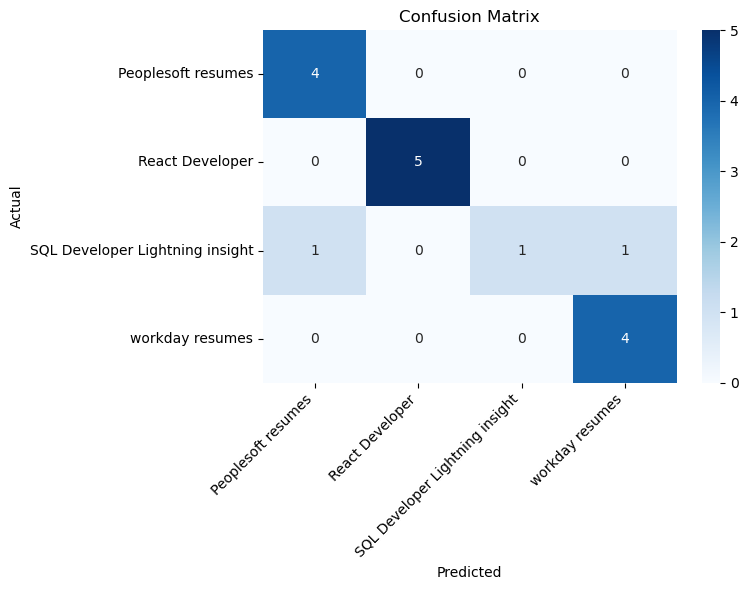

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pickle

test_df = pd.read_csv('test_data.csv')
X_test = test_df['text']
y_test = test_df['category']

with open('tfidf_vectorizer.pkl', 'rb') as f:
    tfidf = pickle.load(f)

with open('resume_classifier_model.pkl', 'rb') as f:
    model = pickle.load(f)

X_test_tfidf = tfidf.transform(X_test)
y_pred = model.predict(X_test_tfidf)

cm = confusion_matrix(y_test, y_pred)
categories = model.classes_

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=categories, yticklabels=categories)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [15]:
import pickle
import re

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-z\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    return text

with open('tfidf_vectorizer.pkl', 'rb') as f:
    tfidf = pickle.load(f)

with open('resume_classifier_model.pkl', 'rb') as f:
    model = pickle.load(f)

def predict_resume(resume_text):
    cleaned = clean_text(resume_text)
    vectorized = tfidf.transform([cleaned])
    prediction = model.predict(vectorized)
    probability = model.predict_proba(vectorized)
    
    return prediction[0], probability[0]

sample_resume = """
React Developer with 3 years experience.
Skills: JavaScript, React.js, Redux, HTML, CSS, Node.js
Worked on multiple web applications using React framework.
"""

category, probs = predict_resume(sample_resume)

print("Prediction:", category)
print("\nProbabilities:")
for cat, prob in zip(model.classes_, probs):
    print(f"  {cat}: {prob*100:.2f}%")

Prediction: React Developer

Probabilities:
  Peoplesoft resumes: 6.59%
  React Developer: 82.31%
  SQL Developer Lightning insight: 3.98%
  workday resumes: 7.12%


In [16]:
import pandas as pd
import pickle
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

train_df = pd.read_csv('train_data.csv')
test_df = pd.read_csv('test_data.csv')

with open('tfidf_vectorizer.pkl', 'rb') as f:
    tfidf = pickle.load(f)

X_train_tfidf = tfidf.transform(train_df['text'])
y_train = train_df['category']
X_test_tfidf = tfidf.transform(test_df['text'])
y_test = test_df['category']

models = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(kernel='linear'),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    results.append({'Model': name, 'Accuracy': round(accuracy * 100, 2)})
    print(f"{name}: {accuracy * 100:.2f}%")

results_df = pd.DataFrame(results)
print("\n" + "=" * 40)
print(results_df.to_string(index=False))
print("=" * 40)

Naive Bayes: 87.50%
Logistic Regression: 100.00%
SVM: 100.00%
Random Forest: 100.00%

              Model  Accuracy
        Naive Bayes      87.5
Logistic Regression     100.0
                SVM     100.0
      Random Forest     100.0


In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
scores = cross_val_score(model, X_train_tfidf, y_train, cv=5)
print(f"Cross-validation scores: {scores}")
print(f"Average: {scores.mean():.2f}")

Cross-validation scores: [1.         1.         0.92307692 0.91666667 1.        ]
Average: 0.97


In [18]:
import pandas as pd
import pickle
import re
from sklearn.svm import SVC

train_df = pd.read_csv('train_data.csv')

with open('tfidf_vectorizer.pkl', 'rb') as f:
    tfidf = pickle.load(f)

X_train_tfidf = tfidf.transform(train_df['text'])
y_train = train_df['category']

best_model = SVC(kernel='linear', probability=True)
best_model.fit(X_train_tfidf, y_train)

with open('best_model_svm.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print("Best model (SVM) saved: best_model_svm.pkl")

def classify_resume(resume_text):
    text = str(resume_text).lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-z\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    
    vectorized = tfidf.transform([text])
    prediction = best_model.predict(vectorized)[0]
    probabilities = best_model.predict_proba(vectorized)[0]
    
    return prediction, probabilities

test_resumes = [
    "Experienced React developer with JavaScript and Redux skills",
    "PeopleSoft FSCM consultant with 5 years experience",
    "SQL developer expert in database design and optimization",
    "Workday HCM implementation specialist"
]

print("\nTesting Classification System:")
print("=" * 60)

for resume in test_resumes:
    category, probs = classify_resume(resume)
    print(f"\nResume: {resume[:50]}...")
    print(f"Predicted: {category}")
    print(f"Confidence: {max(probs)*100:.2f}%")
    
print("System ready for deployment!")

Best model (SVM) saved: best_model_svm.pkl

Testing Classification System:

Resume: Experienced React developer with JavaScript and Re...
Predicted: React Developer
Confidence: 91.81%

Resume: PeopleSoft FSCM consultant with 5 years experience...
Predicted: Peoplesoft resumes
Confidence: 89.44%

Resume: SQL developer expert in database design and optimi...
Predicted: SQL Developer Lightning insight
Confidence: 47.05%

Resume: Workday HCM implementation specialist...
Predicted: workday resumes
Confidence: 43.05%
System ready for deployment!


In [19]:
#modeling with skill column 

import pandas as pd

df = pd.read_csv('resumes_cleaned.csv')
print("Columns in resumes_cleaned.csv:")
print(df.columns.tolist())
print("\nFirst row skills:")
print(df['skills'].iloc[0])

Columns in resumes_cleaned.csv:
['filename', 'category', 'content', 'skills', 'cleaned_text']

First row skills:
react, javascript, js, jsx, redux, html, css, ui, ux


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('resumes_cleaned.csv')

# Combine cleaned_text + skills
df['combined_text'] = df['cleaned_text'] + ' ' + df['skills']

# Split again
X = df['combined_text']
y = df['category']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Save new train/test files
train_df = pd.DataFrame({'text': X_train, 'category': y_train})
test_df = pd.DataFrame({'text': X_test, 'category': y_test})

train_df.to_csv('train_data_with_skills.csv', index=False)
test_df.to_csv('test_data_with_skills.csv', index=False)

print("Combined text + skills!")
print(f"Training: {len(train_df)}")
print(f"Testing: {len(test_df)}")
print("\nSample combined text (first 200 chars):")
print(X_train.iloc[0][:200])

Combined text + skills!
Training: 63
Testing: 16

Sample combined text (first 200 chars):
harikrishna akula summary years of it experience around years of experience in workday involving various activities like integrations reports and requirement gathering design development testing and g


In [27]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

# Load new train/test data
train_df = pd.read_csv('train_data_with_skills.csv')
test_df = pd.read_csv('test_data_with_skills.csv')

X_train = train_df['text']
X_test = test_df['text']

# Create NEW TF-IDF vectorizer
tfidf_with_skills = TfidfVectorizer(max_features=4000)
X_train_tfidf = tfidf_with_skills.fit_transform(X_train)
X_test_tfidf = tfidf_with_skills.transform(X_test)

print("TF-IDF with skills complete!")
print(f"Training shape: {X_train_tfidf.shape}")
print(f"Testing shape: {X_test_tfidf.shape}")

# Save NEW vectorizer
with open('tfidf_with_skills.pkl', 'wb') as f:
    pickle.dump(tfidf_with_skills, f)

print("\n Saved: tfidf_with_skills.pkl")


TF-IDF with skills complete!
Training shape: (63, 4000)
Testing shape: (16, 4000)

 Saved: tfidf_with_skills.pkl


In [28]:
import pandas as pd
import pickle
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load data
train_df = pd.read_csv('train_data_with_skills.csv')
test_df = pd.read_csv('test_data_with_skills.csv')

y_train = train_df['category']
y_test = test_df['category']

# Load NEW vectorizer
with open('tfidf_with_skills.pkl', 'rb') as f:
    tfidf = pickle.load(f)

X_train_tfidf = tfidf.transform(train_df['text'])
X_test_tfidf = tfidf.transform(test_df['text'])

# Train SVM
model_with_skills = SVC(kernel='linear', probability=True)
model_with_skills.fit(X_train_tfidf, y_train)

# Evaluate
y_pred = model_with_skills.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)

print("Model with skills trained!")
print(f"\nAccuracy: {accuracy*100:.2f}%")
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred))

# Save model
with open('model_with_skills.pkl', 'wb') as f:
    pickle.dump(model_with_skills, f)

print("\nSaved: model_with_skills.pkl")

Model with skills trained!

Accuracy: 100.00%

Classification Report:
                                 precision    recall  f1-score   support

             Peoplesoft resumes       1.00      1.00      1.00         4
                React Developer       1.00      1.00      1.00         5
SQL Developer Lightning insight       1.00      1.00      1.00         3
                workday resumes       1.00      1.00      1.00         4

                       accuracy                           1.00        16
                      macro avg       1.00      1.00      1.00        16
                   weighted avg       1.00      1.00      1.00        16


Saved: model_with_skills.pkl


In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import pandas as pd
import pickle

train_df = pd.read_csv('train_data_with_skills.csv')

with open('tfidf_with_skills.pkl', 'rb') as f:
    tfidf = pickle.load(f)

X_train_tfidf = tfidf.transform(train_df['text'])
y_train = train_df['category']

model = SVC(kernel='linear', probability=True)
scores = cross_val_score(model, X_train_tfidf, y_train, cv=5)

print("Cross-validation scores (with skills):")
print(scores)
print(f"\nAverage: {scores.mean()*100:.2f}%")
print(f"Previous (without skills): 97%")

Cross-validation scores (with skills):
[1. 1. 1. 1. 1.]

Average: 100.00%
Previous (without skills): 97%


In [24]:
import pickle
import re

# Load NEW model and vectorizer (with skills)
with open('tfidf_with_skills.pkl', 'rb') as f:
    tfidf = pickle.load(f)

with open('model_with_skills.pkl', 'rb') as f:
    model = pickle.load(f)

# Skills keywords for extraction
skill_keywords = {
    'React Developer': ['react', 'javascript', 'js', 'jsx', 'redux', 'html', 'css', 'node', 'typescript', 'npm', 'webpack', 'frontend', 'ui', 'ux'],
    'workday resumes': ['workday', 'hcm', 'hrms', 'payroll', 'benefits', 'recruiting', 'talent', 'integration', 'studio', 'eib'],
    'SQL Developer Lightning insight': ['sql', 'mysql', 'postgresql', 'oracle', 'database', 'query', 'stored procedure', 'etl', 'ssrs', 'ssis', 'plsql'],
    'Peoplesoft resumes': ['peoplesoft', 'oracle', 'fscm', 'hrms', 'peopletools', 'sqr', 'app engine', 'peoplecode']
}

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-z\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def extract_skills_from_text(text):
    """Extract all possible skills from text"""
    text_lower = text.lower()
    all_skills = []
    
    for category, skills in skill_keywords.items():
        for skill in skills:
            if skill in text_lower:
                all_skills.append(skill)
    
    return ', '.join(set(all_skills)) if all_skills else ''

def classify_resume(resume_text):
    """Classify resume with skills extraction"""
    # Clean text
    cleaned = clean_text(resume_text)
    
    # Extract skills
    skills = extract_skills_from_text(resume_text)
    
    # Combine text + skills
    combined = cleaned + ' ' + skills
    
    # Vectorize and predict
    vectorized = tfidf.transform([combined])
    prediction = model.predict(vectorized)[0]
    probabilities = model.predict_proba(vectorized)[0]
    
    return prediction, probabilities, skills

# Test
test_resumes = [
    "React developer with JavaScript, Redux and HTML experience",
    "PeopleSoft FSCM consultant with Oracle database skills",
    "SQL expert in MySQL and PostgreSQL database optimization",
    "Workday HCM specialist with integration experience"
]

print("Updated Classification System (WITH SKILLS):")
print("=" * 70)
for resume in test_resumes:
    category, probs, skills = classify_resume(resume)
    print(f"\nResume: {resume}")
    print(f"Extracted Skills: {skills}")
    print(f"Predicted: {category}")
    print(f"Confidence: {max(probs)*100:.2f}%")

Updated Classification System (WITH SKILLS):

Resume: React developer with JavaScript, Redux and HTML experience
Extracted Skills: ux, javascript, redux, react, html
Predicted: React Developer
Confidence: 97.07%

Resume: PeopleSoft FSCM consultant with Oracle database skills
Extracted Skills: fscm, database, oracle, peoplesoft
Predicted: Peoplesoft resumes
Confidence: 95.38%

Resume: SQL expert in MySQL and PostgreSQL database optimization
Extracted Skills: mysql, database, postgresql, sql
Predicted: SQL Developer Lightning insight
Confidence: 65.41%

Resume: Workday HCM specialist with integration experience
Extracted Skills: hcm, integration, workday
Predicted: workday resumes
Confidence: 73.45%


In [29]:
# Save the complete function in a file
with open('final_classifier.py', 'w') as f:
    f.write('''import pickle
import re

with open('tfidf_with_skills.pkl', 'rb') as f:
    tfidf = pickle.load(f)

with open('model_with_skills.pkl', 'rb') as f:
    model = pickle.load(f)

skill_keywords = {
    'React Developer': ['react', 'javascript', 'js', 'jsx', 'redux', 'html', 'css', 'node', 'typescript', 'npm', 'webpack', 'frontend', 'ui', 'ux'],
    'workday resumes': ['workday', 'hcm', 'hrms', 'payroll', 'benefits', 'recruiting', 'talent', 'integration', 'studio', 'eib'],
    'SQL Developer Lightning insight': ['sql', 'mysql', 'postgresql', 'oracle', 'database', 'query', 'stored procedure', 'etl', 'ssrs', 'ssis', 'plsql'],
    'Peoplesoft resumes': ['peoplesoft', 'oracle', 'fscm', 'hrms', 'peopletools', 'sqr', 'app engine', 'peoplecode']
}

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-z\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def extract_skills_from_text(text):
    text_lower = text.lower()
    all_skills = []
    for category, skills in skill_keywords.items():
        for skill in skills:
            if skill in text_lower:
                all_skills.append(skill)
    return ', '.join(set(all_skills)) if all_skills else ''

def classify_resume(resume_text):
    cleaned = clean_text(resume_text)
    skills = extract_skills_from_text(resume_text)
    combined = cleaned + ' ' + skills
    vectorized = tfidf.transform([combined])
    prediction = model.predict(vectorized)[0]
    probabilities = model.predict_proba(vectorized)[0]
    return prediction, probabilities, skills
''')

print(" Saved: final_classifier.py")

 Saved: final_classifier.py
